#Import Data Via Kaggle Link

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
df=od.download('https://www.kaggle.com/datasets/puneet6060/intel-image-classification')

#Label Mapping

In [4]:
import os
df=os.listdir('/content/intel-image-classification/seg_train/seg_train')

In [5]:
img_path=[]
labels=[]

for category in df:
  folder_path=os.path.join('/content/intel-image-classification/seg_train/seg_train',category)
  for img in os.listdir(folder_path):
    file_path=os.path.join(folder_path,img)
    img_path.append(file_path)
    labels.append(category)

In [6]:
labels[:5]

['forest', 'forest', 'forest', 'forest', 'forest']

In [7]:
img_path[:5]

['/content/intel-image-classification/seg_train/seg_train/forest/16778.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/4690.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/4258.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/3172.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/8208.jpg']

In [8]:
label_map={}

for index,category in enumerate(df):
  label_map[category]=index

label_map

{'forest': 0,
 'buildings': 1,
 'glacier': 2,
 'street': 3,
 'mountain': 4,
 'sea': 5}

In [9]:
y_train=[]
for i in labels:
  y_train.append(label_map[i])

In [10]:
y_train[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Image PreProcessing

In [11]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array


def preprocess_img(img_path):
  img=load_img(img_path,target_size=(150,150))
  img_array=img_to_array(img)
  img_array=img_array/255.0
  return img_array

In [12]:
import numpy as np

x_train=[]
for img in img_path:
  x_train.append(preprocess_img(img))

x_train=np.array(x_train)
x_train[:1]


array([[[[0.3137255 , 0.42745098, 0.23921569],
         [0.24705882, 0.3764706 , 0.16862746],
         [0.38431373, 0.5411765 , 0.29803923],
         ...,
         [0.3019608 , 0.41960785, 0.30980393],
         [0.5019608 , 0.6       , 0.5254902 ],
         [0.16862746, 0.25490198, 0.20392157]],

        [[0.11764706, 0.23137255, 0.05098039],
         [0.31764707, 0.44313726, 0.2509804 ],
         [0.23529412, 0.37254903, 0.15294118],
         ...,
         [0.25882354, 0.38039216, 0.25882354],
         [0.56078434, 0.654902  , 0.6       ],
         [0.07843138, 0.16078432, 0.13333334]],

        [[0.01960784, 0.14117648, 0.        ],
         [0.21176471, 0.3254902 , 0.15294118],
         [0.19215687, 0.29803923, 0.13725491],
         ...,
         [0.3019608 , 0.42352942, 0.2901961 ],
         [0.50980395, 0.6       , 0.5764706 ],
         [0.02745098, 0.10196079, 0.12941177]],

        ...,

        [[0.22352941, 0.3647059 , 0.1254902 ],
         [0.2901961 , 0.43137255, 0.1882353 ]

#Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [14]:
augmentation.fit(x_train)

In [15]:
augment=augmentation.flow(x_train,y_train)

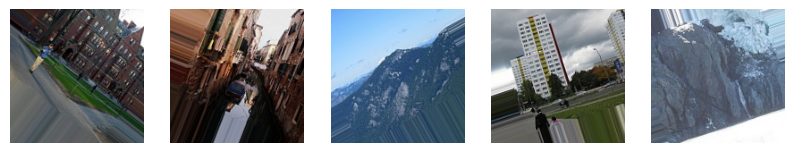

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(augment[0][0][i])
  plt.axis("off")
plt.show()

#Model Creation

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense

model = tf.keras.Sequential([
            Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)),
            MaxPooling2D((2,2)),
            Conv2D(32,(3,3), activation = 'relu'),
            MaxPooling2D((2,2)),
            Conv2D(32,(3,3), activation = 'relu'),
            AveragePooling2D((2,2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10,activation = "softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(augment,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 440s 997ms/step - accuracy: 0.4693 - loss: 1.3040
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 433s 985ms/step - accuracy: 0.6448 - loss: 0.9394
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 430s 980ms/step - accuracy: 0.6814 - loss: 0.8284
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 442s 978ms/step - accuracy: 0.7258 - loss: 0.7378
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 435s 991ms/step - accuracy: 0.7350 - loss: 0.7064
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 435s 976ms/step - accuracy: 0.7577 - loss: 0.6550
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 464s 1s/step - accuracy: 0.7650 - loss: 0.6354
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.7650 - loss: 0.6268
Epoch 9/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 433s 986ms/step - accuracy: 0.7810 - loss: 0.5933
Epoch 10/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.7796 - loss: 0.5994  


In [20]:
test=os.listdir('/content/intel-image-classification/seg_test/seg_test')

img_path_test=[]
labels_test=[]

for category in test:
  folder_path=os.path.join('/content/intel-image-classification/seg_test/seg_test',category)
  for img in os.listdir(folder_path):
    file_path=os.path.join(folder_path,img)
    img_path_test.append(file_path)
    labels_test.append(category)

In [21]:
y_test=[]
for i in labels_test:
  y_test.append(label_map[i])

In [23]:
y_test[:5]

[0, 0, 0, 0, 0]

In [24]:
import numpy as np
x_test=[]

for img in img_path_test:
  x_test.append(preprocess_img(img))

x_test=np.array(x_test)
x_test[:2]

array([[[[0.14117648, 0.25490198, 0.        ],
         [0.30588236, 0.43137255, 0.05098039],
         [0.5176471 , 0.64705884, 0.23921569],
         ...,
         [0.05490196, 0.05098039, 0.04313726],
         [0.04705882, 0.04705882, 0.03921569],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.38039216, 0.49803922, 0.16078432],
         [0.36078432, 0.47058824, 0.12941177],
         [0.27058825, 0.38431373, 0.02352941],
         ...,
         [0.05098039, 0.04705882, 0.03921569],
         [0.04705882, 0.04705882, 0.03921569],
         [0.04313726, 0.04313726, 0.03529412]],

        [[0.34901962, 0.46666667, 0.18431373],
         [0.30588236, 0.40784314, 0.12941177],
         [0.27058825, 0.3372549 , 0.07058824],
         ...,
         [0.04705882, 0.04313726, 0.02745098],
         [0.04313726, 0.04705882, 0.02745098],
         [0.03529412, 0.03921569, 0.01960784]],

        ...,

        [[0.08627451, 0.12156863, 0.01568628],
         [0.13333334, 0.16470589, 0.07450981]

In [25]:
model.evaluate(x_test,np.array(y_test))

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.8726 - loss: 0.3695


[0.5178307890892029, 0.8216666579246521]